# WEB SCRAPING & EDA PROJECT - FORTUNE 500 COMPANIES

## 1. Business statement

>a. To find the top 10 industries with highest profit based on year 2021.
>
>b. To find the top 10 and last 10 companies based on their Income.
    

## 2. Data Collection

In [6]:
# Importing required libraries for project.
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os
import operator

In [7]:
# Requesting to load the webpage

response = requests.get("https://www.fortuneindia.com/fortune-500/company-listing/?year=2021&page=1&query=&per_page=500")

In [8]:
# Checking the Status of the webPage

response

<Response [200]>

In [9]:
# Extracting the HTML Code of the WebPage

data = BeautifulSoup(response.text)

In [10]:
data

<!DOCTYPE html>
<html lang="en">
<head>
<title>Fortune India: Business News, Strategy, Finance and Corporate Insight</title>
<meta content="Fortune India 500 Ranking | Fortune India" name="title"/>
<meta content="Fortune India 500 is the definitive ranking of India's 500 largest corporations | Fortune India" itemprop="description" name="description"/>
<meta content="https://fea.assettype.com/abp/assets/500-bbd82aacac.jpg" name="image"/>
<meta content="Fortune India 500 Ranking | Fortune India" property="og:title"/>
<meta content="Fortune India 500 is the definitive ranking of India's 500 largest corporations | Fortune India" property="og:description"/>
<meta content="https://fea.assettype.com/abp/assets/500-bbd82aacac.jpg" property="og:image"/>
<meta content="Fortune India 500 Ranking | Fortune India" name="twitter:title"/>
<meta content="Fortune India 500 is the definitive ranking of India's 500 largest corporations | Fortune India" name="twitter:description"/>
<meta content="https://

In [11]:
# Finding the HTML code of required Table

newd = data.find_all("table", class_="table")
print(newd)

[<table class="table">
<thead>
<tr class="mpw-tr">
<th class="f-500-tablehead primary-header" colspan="2" id="company-rank">Rank</th>
<th class="f-500-tablehead primary-header"></th>
<th class="f-500-tablehead primary-header"></th>
<th class="f-500-tablehead primary-header"></th>
<th class="f-500-tablehead primary-header" colspan="2">Total Income</th>
<th class="f-500-tablehead primary-header" colspan="2">Net Income</th>
<th class="f-500-tablehead primary-header" colspan="2" id="profit-rank">Profit</th>
<th class="f-500-tablehead primary-header" colspan="2">Interest cost</th>
<th class="f-500-tablehead primary-header">Cash &amp; Bank Balance</th>
<th class="f-500-tablehead primary-header">Total Debt</th>
<th class="f-500-tablehead primary-header">Debt-Equity Ratio</th>
<th class="f-500-tablehead primary-header" colspan="2" id="assest-rank">Total Assets</th>
<th class="f-500-tablehead primary-header" colspan="2" id="networth-rank">Networth</th>
<th class="f-500-tablehead primary-header"

In [13]:
# Extracting table from html code
import html5lib
table = pd.read_html(str(newd))[0]
table


Rank      Unnamed: 2_level_0           Unnamed: 3_level_0  \
    2021 2020             Change                      Company   
0      1    1                  0          Reliance Industries   
1      2    4                  2          State Bank of India   
2      3    2                 -1       Indian Oil Corporation   
3      4    3                 -1                         ONGC   
4      5    6                  1                  Tata Motors   
..   ...  ...                ...                          ...   
495  496  499                  3  Ahluwalia Contracts (India)   
496  497  438                -59            Himatsingka Seide   
497  498  NAP                NEW            Tata Teleservices   
498  499  NAP                NEW                  Dodla Dairy   
499  500  NAP                NEW                  Jyothy Labs   

      Unnamed: 4_level_0           Total Income           Net Income          \
               Ownership               industry   Rs cr YoY change %   Rs cr   
0          Mukesh Ambani              Oil & gas  514217       -16.50  466924   
1          Govt of India                  Banks  385338         4.71  278115   
2          Govt of India              Oil & gas  374828       -24.02  363950   
3          Govt of India              Oil & gas  325179       -19.83  304001   
4                   Tata                   Auto  249646        -4.70  249795   
..                   ...                    ...     ...          ...     ...   
495  Bikramjit Ahluwalia           Construction    2005         5.76    1982   
496       DK Himatsingka               Textiles    1994       -16.90    2258   
497                 Tata  Telecom (Ancillaries)    1982       -19.52    1605   
498    Dodla Sunil Reddy                   FMCG    1966        -5.87    1944   
499      MP Ramachandran                   FMCG    1954        10.82    1909   

          Profit  ...   RONW         ROCE Employees                      \
    YoY change %  ...   Rank YoY change %     Rs cr   Rank YoY change %   
0         -21.86  ...    7.0        30.71  700172.0    1.0        55.88   
1           3.06  ...    1.0        15.59  251984.0    2.0        10.86   
2         -24.77  ...   27.0         1.73  111838.0    8.0        17.23   
3         -23.38  ...   16.0         8.14  220981.0    3.0         7.74   
4          -4.32  ...   30.0         5.27   55247.0   27.0       -12.42   
..           ...  ...    ...          ...       ...    ...          ...   
495         5.16  ...  473.0        13.95     879.0  441.0         9.46   
496        -4.22  ...  305.0        -9.01    1315.0  397.0        -3.29   
497       -13.29  ...  463.0       -66.71  -17787.0  499.0       -41.32   
498        -9.13  ...  490.0        26.80     658.0  460.0        51.79   
499        11.57  ...  440.0         1.65    1429.0  389.0        16.27   

    Unnamed: 25_level_0 Unnamed: 26_level_0 Unnamed: 27_level_0  \
                    (%)                 (%)            (in nos)   
0                  8.42                7.81            236334.0   
1                 10.10                0.52            245652.0   
2                 21.00               14.55             31648.0   
3                 10.02                9.18             28479.0   
4                  5.23                5.07             50837.0   
..                  ...                 ...                 ...   
495                9.18               14.06              2214.0   
496               -3.99                3.40              8129.0   
497                0.00                0.00              1200.0   
498               23.08               28.98              2458.0   
499               15.81               17.13              2559.0   

    Unnamed: 28_level_0 Unnamed: 29_level_0  
                   Rank        YoY change %  
0                   6.0               20.81  
1                   5.0               -1.52  
2                  31.0               -4.09  
3                  34.0               -

In [14]:
type(table)

pandas.core.frame.DataFrame

In [15]:
# finding table information
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Rank, 2021)                              500 non-null    int64  
 1   (Rank, 2020)                              476 non-null    object 
 2   (Unnamed: 2_level_0, Change)              500 non-null    object 
 3   (Unnamed: 3_level_0, Company)             500 non-null    object 
 4   (Unnamed: 4_level_0, Ownership)           500 non-null    object 
 5   (Total Income, industry)                  500 non-null    object 
 6   (Total Income, Rs cr)                     500 non-null    int64  
 7   (Net Income, YoY change %)                500 non-null    float64
 8   (Net Income, Rs cr)                       500 non-null    int64  
 9   (Profit, YoY change %)                    500 non-null    float64
 10  (Profit, Rs cr)                       

In [16]:
# getting the current working directory
import os
os.getcwd()

'C:\\Users\\dellpc'

In [18]:
# Saving the table as csv file
table.to_csv('C:\\Users\\dellpc\\Fortune 500',index = False) 

In [21]:
# Reading the csv file
Fort = pd.read_csv('Fortune 500')
Fort

,Rank,Rank.1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Total Income,Total Income.1,Net Income,Net Income.1,Profit,...,RONW,ROCE,Employees,Employees.1,Employees.2,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0
0,2021,2020,Change,Company,Ownership,industry,Rs cr,YoY change %,Rs cr,YoY change %,...,Rank,YoY change %,Rs cr,Rank,YoY change %,(%),(%),(in nos),Rank,YoY change %
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,7.0,30.71,700172.0,1.0,55.88,8.42,7.81,236334.0,6.0,20.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,1.0,15.59,251984.0,2.0,10.86,10.1,0.52,245652.0,5.0,-1.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,27.0,1.73,111838.0,8.0,17.23,21.0,14.55,31648.0,31.0,-4.09
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,16.0,8.14,220981.0,3.0,7.74,10.02,9.18,28479.0,34.0,-5.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,473.0,13.95,879.0,441.0,9.46,9.18,14.06,2214.0,312.0,5.78
497,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.9,2258,-4.22,...,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.4,8129.0,124.0,50.62
498,498,NAP,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,463.0,-66.71,-17787.0,499.0,-41.32,0.0,0.0,1200.0,380.0,NAP
499,499,NAP,NEW,Dodla Dairy,Dodla Sunil Reddy,FMCG,1966,-5.87,1944,-9.13,...,490.0,26.8,658.0,460.0,51.79,23.08,28.98,2458.0,293.0,NAP


## 3.Data Cleaning

In [22]:
# rearranging the column names using iloc
Fort.columns = [Fort.columns,Fort.iloc[0]]
Fort = Fort[1:]
Fort.head()


,Rank,Rank.1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Total Income,Total Income.1,Net Income,Net Income.1,Profit,...,RONW,ROCE,Employees,Employees.1,Employees.2,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0,Unnamed: 29_level_0
,2021,2020,Change,Company,Ownership,industry,Rs cr,YoY change %,Rs cr,YoY change %,...,Rank,YoY change %,Rs cr,Rank,YoY change %,(%),(%),(in nos),Rank,YoY change %
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,7.0,30.71,700172.0,1.0,55.88,8.42,7.81,236334.0,6.0,20.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,1.0,15.59,251984.0,2.0,10.86,10.1,0.52,245652.0,5.0,-1.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,27.0,1.73,111838.0,8.0,17.23,21.0,14.55,31648.0,31.0,-4.09
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,16.0,8.14,220981.0,3.0,7.74,10.02,9.18,28479.0,34.0,-5.40
5,5,6,1,Tata Motors,Tata,Auto,249646,-4.7,249795,-4.32,...,30.0,5.27,55247.0,27.0,-12.42,5.23,5.07,50837.0,22.0,-35.57


In [23]:
Fort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Rank, 2021)                              500 non-null    int64 
 1   (Rank.1, 2020)                            476 non-null    object
 2   (Unnamed: 2_level_0, Change)              500 non-null    object
 3   (Unnamed: 3_level_0, Company)             500 non-null    object
 4   (Unnamed: 4_level_0, Ownership)           500 non-null    object
 5   (Total Income, industry)                  500 non-null    object
 6   (Total Income.1, Rs cr)                   500 non-null    object
 7   (Net Income, YoY change %)                500 non-null    object
 8   (Net Income.1, Rs cr)                     500 non-null    object
 9   (Profit, YoY change %)                    500 non-null    object
 10  (Profit.1, Rs cr)                         500 non-

In [24]:
# finding the  number of null values in each column
Fort.isnull().sum()

Rank                 2021                   0
Rank.1               2020                  24
Unnamed: 2_level_0   Change                 0
Unnamed: 3_level_0   Company                0
Unnamed: 4_level_0   Ownership              0
Total Income         industry               0
Total Income.1       Rs cr                  0
Net Income           YoY change %           0
Net Income.1         Rs cr                  0
Profit               YoY change %           0
Profit.1             Rs cr                  0
Interest cost        Rank                   0
Interest cost.1      YoY change %           0
Cash & Bank Balance  % of total income      0
Total Debt           Rs cr                  0
Debt-Equity Ratio    % of Ebitda            0
Total Assets         Rs cr                  0
Total Assets.1       Rs cr.1                0
Networth             (x)                    0
Networth.1           Rs cr                  0
RONW                 Rank                   0
ROCE                 YoY change % 

In [25]:
# using fillna() filling the null values in Rank.1 column
Fort['Rank.1'] = Fort['Rank.1'].fillna(0)

C:\Users\dellpc\AppData\Local\Temp\ipykernel_25104\2046152375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fort['Rank.1'] = Fort['Rank.1'].fillna(0)


In [26]:
Fort['Rank.1']

,2020
1,1
2,4
3,2
4,3
5,6
...,...
496,499
497,438
498,NAP
499,NAP


In [27]:
# checking for null values in Rank.1 column
Fort['Rank.1'].isnull().sum()

0
2020    0
dtype: int64

In [16]:
# deleting unwanted columns

In [28]:
del Fort['Unnamed: 29_level_0']

In [29]:
Fort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Rank, 2021)                              500 non-null    int64 
 1   (Rank.1, 2020)                            500 non-null    object
 2   (Unnamed: 2_level_0, Change)              500 non-null    object
 3   (Unnamed: 3_level_0, Company)             500 non-null    object
 4   (Unnamed: 4_level_0, Ownership)           500 non-null    object
 5   (Total Income, industry)                  500 non-null    object
 6   (Total Income.1, Rs cr)                   500 non-null    object
 7   (Net Income, YoY change %)                500 non-null    object
 8   (Net Income.1, Rs cr)                     500 non-null    object
 9   (Profit, YoY change %)                    500 non-null    object
 10  (Profit.1, Rs cr)                         500 non-

In [30]:
del Fort['Unnamed: 27_level_0']

In [31]:
Fort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Rank, 2021)                              500 non-null    int64 
 1   (Rank.1, 2020)                            500 non-null    object
 2   (Unnamed: 2_level_0, Change)              500 non-null    object
 3   (Unnamed: 3_level_0, Company)             500 non-null    object
 4   (Unnamed: 4_level_0, Ownership)           500 non-null    object
 5   (Total Income, industry)                  500 non-null    object
 6   (Total Income.1, Rs cr)                   500 non-null    object
 7   (Net Income, YoY change %)                500 non-null    object
 8   (Net Income.1, Rs cr)                     500 non-null    object
 9   (Profit, YoY change %)                    500 non-null    object
 10  (Profit.1, Rs cr)                         500 non-

In [32]:
del Fort['Unnamed: 28_level_0']

In [33]:
# filling null values in "Unnamed: 26_level_0" column with it's MEDIAN
Fort['Unnamed: 26_level_0'] = Fort['Unnamed: 26_level_0'].fillna(Fort['Unnamed: 26_level_0'].median())
Fort['Unnamed: 26_level_0']

C:\Users\dellpc\AppData\Local\Temp\ipykernel_25104\1192936572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fort['Unnamed: 26_level_0'] = Fort['Unnamed: 26_level_0'].fillna(Fort['Unnamed: 26_level_0'].median())


,(%)
1,7.81
2,0.52
3,14.55
4,9.18
5,5.07
...,...
496,14.06
497,3.4
498,0.0
499,28.98


In [34]:
# Checking for null values in "Unnamed: 26_level_0" column
Fort['Unnamed: 26_level_0'].isnull().sum()

0
(%)    0
dtype: int64

In [35]:
# Fetching the information of total columns
Fort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   (Rank, 2021)                              500 non-null    int64 
 1   (Rank.1, 2020)                            500 non-null    object
 2   (Unnamed: 2_level_0, Change)              500 non-null    object
 3   (Unnamed: 3_level_0, Company)             500 non-null    object
 4   (Unnamed: 4_level_0, Ownership)           500 non-null    object
 5   (Total Income, industry)                  500 non-null    object
 6   (Total Income.1, Rs cr)                   500 non-null    object
 7   (Net Income, YoY change %)                500 non-null    object
 8   (Net Income.1, Rs cr)                     500 non-null    object
 9   (Profit, YoY change %)                    500 non-null    object
 10  (Profit.1, Rs cr)                         500 non-

In [36]:
Fort

,Rank,Rank.1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Total Income,Total Income.1,Net Income,Net Income.1,Profit,...,Total Assets.1,Networth,Networth.1,RONW,ROCE,Employees,Employees.1,Employees.2,Unnamed: 25_level_0,Unnamed: 26_level_0
,2021,2020,Change,Company,Ownership,industry,Rs cr,YoY change %,Rs cr,YoY change %,...,Rs cr.1,(x),Rs cr,Rank,YoY change %,Rs cr,Rank,YoY change %,(%),(%)
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,270648.0,0.54,1094771.0,7.0,30.71,700172.0,1.0,55.88,8.42,7.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,4149127.0,0.0,4653343.0,1.0,15.59,251984.0,2.0,10.86,10.1,0.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,116653.0,1.19,234495.0,27.0,1.73,111838.0,8.0,17.23,21.0,14.55
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,133187.0,0.62,418978.0,16.0,8.14,220981.0,3.0,7.74,10.02,9.18
5,5,6,1,Tata Motors,Tata,Auto,249646,-4.7,249795,-4.32,...,142131.0,2.26,227426.0,30.0,5.27,55247.0,27.0,-12.42,5.23,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,68.0,0.09,1107.0,473.0,13.95,879.0,441.0,9.46,9.18,14.06
497,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.9,2258,-4.22,...,2593.0,2.08,4217.0,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.4
498,498,NAP,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,18702.0,0.0,1286.0,463.0,-66.71,-17787.0,499.0,-41.32,0.0,0.0


In [37]:
# Loading the above data into csv file
Fort.to_csv('C:\\Users\\dellpc\\UpdatedFortune.csv',index = False)

In [37]:
# Rading the csv file
F1 = pd.read_csv("UpdatedFortune.csv")
F1

,Rank,Rank.1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Total Income,Total Income.1,Net Income,Net Income.1,Profit,...,Total Assets.1,Networth,Networth.1,RONW,ROCE,Employees,Employees.1,Employees.2,Unnamed: 25_level_0,Unnamed: 26_level_0
0,2021,2020,Change,Company,Ownership,industry,Rs cr,YoY change %,Rs cr,YoY change %,...,Rs cr.1,(x),Rs cr,Rank,YoY change %,Rs cr,Rank,YoY change %,(%),(%)
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,270648.0,0.54,1094771.0,7.0,30.71,700172.0,1.0,55.88,8.42,7.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,4149127.0,0.0,4653343.0,1.0,15.59,251984.0,2.0,10.86,10.1,0.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,116653.0,1.19,234495.0,27.0,1.73,111838.0,8.0,17.23,21.0,14.55
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,133187.0,0.62,418978.0,16.0,8.14,220981.0,3.0,7.74,10.02,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,68.0,0.09,1107.0,473.0,13.95,879.0,441.0,9.46,9.18,14.06
497,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.9,2258,-4.22,...,2593.0,2.08,4217.0,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.4
498,498,NAP,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,18702.0,0.0,1286.0,463.0,-66.71,-17787.0,499.0,-41.32,0.0,0.0
499,499,NAP,NEW,Dodla Dairy,Dodla Sunil Reddy,FMCG,1966,-5.87,1944,-9.13,...,99.0,0.24,768.0,490.0,26.8,658.0,460.0,51.79,23.08,28.98


In [38]:
# dropping unwanted row in data
F1 = F1.drop(0)

In [39]:
F1

,Rank,Rank.1,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Total Income,Total Income.1,Net Income,Net Income.1,Profit,...,Total Assets.1,Networth,Networth.1,RONW,ROCE,Employees,Employees.1,Employees.2,Unnamed: 25_level_0,Unnamed: 26_level_0
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,270648.0,0.54,1094771.0,7.0,30.71,700172.0,1.0,55.88,8.42,7.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,4149127.0,0.0,4653343.0,1.0,15.59,251984.0,2.0,10.86,10.1,0.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,116653.0,1.19,234495.0,27.0,1.73,111838.0,8.0,17.23,21.0,14.55
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,133187.0,0.62,418978.0,16.0,8.14,220981.0,3.0,7.74,10.02,9.18
5,5,6,1,Tata Motors,Tata,Auto,249646,-4.7,249795,-4.32,...,142131.0,2.26,227426.0,30.0,5.27,55247.0,27.0,-12.42,5.23,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,68.0,0.09,1107.0,473.0,13.95,879.0,441.0,9.46,9.18,14.06
497,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.9,2258,-4.22,...,2593.0,2.08,4217.0,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.4
498,498,NAP,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,18702.0,0.0,1286.0,463.0,-66.71,-17787.0,499.0,-41.32,0.0,0.0
499,499,NAP,NEW,Dodla Dairy,Dodla Sunil Reddy,FMCG,1966,-5.87,1944,-9.13,...,99.0,0.24,768.0,490.0,26.8,658.0,460.0,51.79,23.08,28.98


In [40]:
# Renaming the colums with appropriate names
F1 = F1.rename(columns = {"Rank":"Rank 2021","Rank.1":"Rank 2020","Unnamed: 2_level_0":"Rank change","Unnamed: 3_level_0":"Company name","Unnamed: 4_level_0":"Ownership","Total Income":"Industry","Total Income.1":"Total_Income in crores","Net Income":"Total_Income YoY% change ","Net Income.1":"Net_Income in crores","Profit":"Net_Income YoY%change","Profit.1":"Profit in crores","Interest cost":"Profit Rank","Interest cost.1":"Profit YoY% change","Cash & Bank Balance":"Profit % of TotalIncome","Total Debt":"Interest_cost in crores","Debt-Equity Ratio":"Interest_cost % of Ebitda","Total Assets":"Cash & Bank Balance in crores","Total Assets.1":"Total_Debt in crores","Networth":"Debt-Equity Ratio","Networth.1":"Total_Assets in crores","RONW":"Total_Assets Rank","ROCE":"Total_Assets YoY % change","Employees":"Net_worth in crores","Employees.1":"Net_worthin Rank","Employees.2":"Net_worth YoY % change","Unnamed: 25_level_0":"RONW %","Unnamed: 26_level_0":"ROCE %"})

In [41]:
F1

,Rank 2021,Rank 2020,Rank change,Company name,Ownership,Industry,Total_Income in crores,Total_Income YoY% change,Net_Income in crores,Net_Income YoY%change,...,Total_Debt in crores,Debt-Equity Ratio,Total_Assets in crores,Total_Assets Rank,Total_Assets YoY % change,Net_worth in crores,Net_worthin Rank,Net_worth YoY % change,RONW %,ROCE %
1,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.5,466924,-21.86,...,270648.0,0.54,1094771.0,7.0,30.71,700172.0,1.0,55.88,8.42,7.81
2,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,4149127.0,0.0,4653343.0,1.0,15.59,251984.0,2.0,10.86,10.1,0.52
3,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,116653.0,1.19,234495.0,27.0,1.73,111838.0,8.0,17.23,21.0,14.55
4,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,133187.0,0.62,418978.0,16.0,8.14,220981.0,3.0,7.74,10.02,9.18
5,5,6,1,Tata Motors,Tata,Auto,249646,-4.7,249795,-4.32,...,142131.0,2.26,227426.0,30.0,5.27,55247.0,27.0,-12.42,5.23,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,68.0,0.09,1107.0,473.0,13.95,879.0,441.0,9.46,9.18,14.06
497,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.9,2258,-4.22,...,2593.0,2.08,4217.0,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.4
498,498,NAP,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,18702.0,0.0,1286.0,463.0,-66.71,-17787.0,499.0,-41.32,0.0,0.0
499,499,NAP,NEW,Dodla Dairy,Dodla Sunil Reddy,FMCG,1966,-5.87,1944,-9.13,...,99.0,0.24,768.0,490.0,26.8,658.0,460.0,51.79,23.08,28.98


In [42]:
# getting information 
F1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 1 to 500
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Rank 2021                      500 non-null    int64 
 1   Rank 2020                      500 non-null    object
 2   Rank change                    500 non-null    object
 3   Company name                   500 non-null    object
 4   Ownership                      500 non-null    object
 5   Industry                       500 non-null    object
 6   Total_Income in crores         500 non-null    object
 7   Total_Income YoY% change       500 non-null    object
 8   Net_Income in crores           500 non-null    object
 9   Net_Income YoY%change          500 non-null    object
 10  Profit in crores               500 non-null    object
 11  Profit Rank                    500 non-null    object
 12  Profit YoY% change             500 non-null    object
 13  Profi

In [ ]:
# changing the data types for columns in the data

In [43]:
F1['Total_Income in crores'] = F1['Total_Income in crores'].apply(pd.to_numeric)

In [44]:
F1['Net_Income in crores'] = F1['Net_Income in crores'].apply(pd.to_numeric) 

In [45]:
F1['Profit in crores'] = F1['Profit in crores'].apply(pd.to_numeric)

In [46]:
F1['Profit Rank'] = F1['Profit Rank'].apply(pd.to_numeric)

In [47]:
F1['Cash & Bank Balance in crores'] = F1['Cash & Bank Balance in crores'].apply(pd.to_numeric)

In [48]:
F1['Total_Debt in crores'] = F1['Total_Debt in crores'].apply(pd.to_numeric)

In [49]:
F1['Total_Assets in crores'] = F1['Total_Assets in crores'].apply(pd.to_numeric)

In [50]:
F1['Debt-Equity Ratio'] = F1['Debt-Equity Ratio'].astype(float)

In [51]:
F1['Total_Assets Rank'] = F1['Total_Assets Rank'].apply(pd.to_numeric)

In [52]:
F1['Net_worth in crores'] = F1['Net_worth in crores'].apply(pd.to_numeric)

In [53]:
F1['Net_worthin Rank'] = F1['Net_worthin Rank'].apply(pd.to_numeric)

In [ ]:
# replacing the names for data in industry column

In [54]:
F1['Industry']= F1['Industry'].replace('Oil & Gas','Oil & gas')

In [55]:
F1['Industry']= F1['Industry'].replace('IT Services','IT services')

In [56]:
F1['Industry']= F1['Industry'].replace('Logistics (Ship building)','Logistics (ship building)')

In [57]:
F1['Industry']= F1['Industry'].replace('Power Services','Power services')

In [58]:
F1['Industry']= F1['Industry'].replace('Real Estate','Real estate')

With this we completed data cleaning and saving this into csv file.

### 4. Data Analysis & Data Visualization

In [60]:
# loading data into csv file 
F1.to_csv('C:\\Users\\pavan\\Desktop\\Jai\\Innomatics\\ReUpdatedFortune.csv',index = False)

In [19]:
# Reading csv file
F2 = pd.read_csv("ReUpdatedFortune.csv")
F2

,Rank 2021,Rank 2020,Rank change,Company name,Ownership,Industry,Total_Income in crores,Total_Income YoY% change,Net_Income in crores,Net_Income YoY%change,...,Total_Debt in crores,Debt-Equity Ratio,Total_Assets in crores,Total_Assets Rank,Total_Assets YoY % change,Net_worth in crores,Net_worthin Rank,Net_worth YoY % change,RONW %,ROCE %
0,1,1,0,Reliance Industries,Mukesh Ambani,Oil & gas,514217,-16.50,466924,-21.86,...,270648.0,0.54,1094771.0,7.0,30.71,700172.0,1.0,55.88,8.42,7.81
1,2,4,2,State Bank of India,Govt of India,Banks,385338,4.71,278115,3.06,...,4149127.0,0.00,4653343.0,1.0,15.59,251984.0,2.0,10.86,10.10,0.52
2,3,2,-1,Indian Oil Corporation,Govt of India,Oil & gas,374828,-24.02,363950,-24.77,...,116653.0,1.19,234495.0,27.0,1.73,111838.0,8.0,17.23,21.00,14.55
3,4,3,-1,ONGC,Govt of India,Oil & gas,325179,-19.83,304001,-23.38,...,133187.0,0.62,418978.0,16.0,8.14,220981.0,3.0,7.74,10.02,9.18
4,5,6,1,Tata Motors,Tata,Auto,249646,-4.70,249795,-4.32,...,142131.0,2.26,227426.0,30.0,5.27,55247.0,27.0,-12.42,5.23,5.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,499,3,Ahluwalia Contracts (India),Bikramjit Ahluwalia,Construction,2005,5.76,1982,5.16,...,68.0,0.09,1107.0,473.0,13.95,879.0,441.0,9.46,9.18,14.06
496,497,438,-59,Himatsingka Seide,DK Himatsingka,Textiles,1994,-16.90,2258,-4.22,...,2593.0,2.08,4217.0,305.0,-9.01,1315.0,397.0,-3.29,-3.99,3.40
497,498,Not,NEW,Tata Teleservices,Tata,Telecom (Ancillaries),1982,-19.52,1605,-13.29,...,18702.0,0.00,1286.0,463.0,-66.71,-17787.0,499.0,-41.32,0.00,0.00
498,499,Not,NEW,Dodla Dairy,Dodla Sunil Reddy,FMCG,1966,-5.87,1944,-9.13,...,99.0,0.24,768.0,490.0,26.80,658.0,460.0,51.79,23.08,28.98


In [20]:
F2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank 2021                      500 non-null    int64  
 1   Rank 2020                      500 non-null    object 
 2   Rank change                    500 non-null    object 
 3   Company name                   500 non-null    object 
 4   Ownership                      500 non-null    object 
 5   Industry                       500 non-null    object 
 6   Total_Income in crores         500 non-null    int64  
 7   Total_Income YoY% change       500 non-null    float64
 8   Net_Income in crores           500 non-null    int64  
 9   Net_Income YoY%change          500 non-null    float64
 10  Profit in crores               500 non-null    int64  
 11  Profit Rank                    500 non-null    int64  
 12  Profit YoY% change             500 non-null    flo

In [21]:
# Finding the correlation between all columns in the dataset

In [224]:
F2.corr()

,Rank 2021,Total_Income in crores,Total_Income YoY% change,Net_Income in crores,Net_Income YoY%change,Profit in crores,Profit Rank,Profit YoY% change,Cash & Bank Balance in crores,Total_Debt in crores,Debt-Equity Ratio,Total_Assets in crores,Total_Assets Rank,Total_Assets YoY % change,Net_worth in crores,Net_worthin Rank,Net_worth YoY % change,RONW %,ROCE %
Rank 2021,1.000000,-0.474939,-0.088900,-0.480205,-0.103615,-0.326611,0.582556,-0.011781,-0.305549,-0.282694,-0.069902,-0.321087,0.042112,-0.074009,-0.383609,0.642907,0.087346,-0.062103,-0.028382
Total_Income in crores,-0.474939,1.000000,0.003405,0.992810,-0.006228,0.662139,-0.358793,-0.001172,0.495564,0.521588,0.012884,0.623883,-0.047481,0.014281,0.854753,-0.387561,-0.011414,0.015433,-0.015896
Total_Income YoY% change,-0.088900,0.003405,1.000000,-0.004945,0.905082,0.083702,-0.305436,0.066836,0.103527,0.111334,0.012923,0.098789,0.069777,0.021259,0.017628,-0.102146,0.114898,0.027433,-0.026254
Net_Income in crores,-0.480205,0.992810,-0.004945,1.000000,-0.010179,0.649365,-0.357147,-0.000386,0.410869,0.437049,0.016710,0.541912,-0.047235,0.018035,0.833638,-0.387414,-0.014419,0.015702,-0.013748
Net_Income YoY%change,-0.103615,-0.006228,0.905082,-0.010179,1.000000,0.071787,-0.282855,0.084334,0.087105,0.101091,0.015632,0.086775,0.080226,0.023029,0.002415,-0.071047,0.072181,0.032623,-0.021129
Profit in crores,-0.326611,0.662139,0.083702,0.649365,0.071787,1.000000,-0.521589,-0.002868,0.317104,0.363427,0.048151,0.445219,-0.025072,0.049844,0.753808,-0.390189,0.207485,0.008425,0.018232
Profit Rank,0.582556,-0.358793,-0.305436,-0.357147,-0.282855,-0.521589,1.000000,-0.049952,-0.244605,-0.237568,-0.070324,-0.272527,-0.001054,-0.075681,-0.370408,0.672810,-0.065473,-0.064096,-0.071675
Profit YoY% change,-0.011781,-0.001172,0.066836,-0.000386,0.084334,-0.002868,-0.049952,1.000000,0.003102,0.002877,-0.020088,0.003884,-0.005672,-0.020074,0.014266,-0.002963,0.011326,-0.007486,-0.019317
Cash & Bank Balance in crores,-0.305549,0.495564,0.103527,0.410869,0.087105,0.317104,-0.244605,0.003102,1.000000,0.936672,-0.010388,0.923920,-0.059771,-0.008819,0.438367,-0.286868,0.015031,-0.012732,-0.015183
Total_Debt in crores,-0.282694,0.521588,0.111334,0.437049,0.101091,0.363427,-0.237568,0.002877,0.936672,1.000000,-0.023052,0.987381,-0.046802,-0.021469,0.485003,-0.262712,0.013116,-0.003445,-0.031325


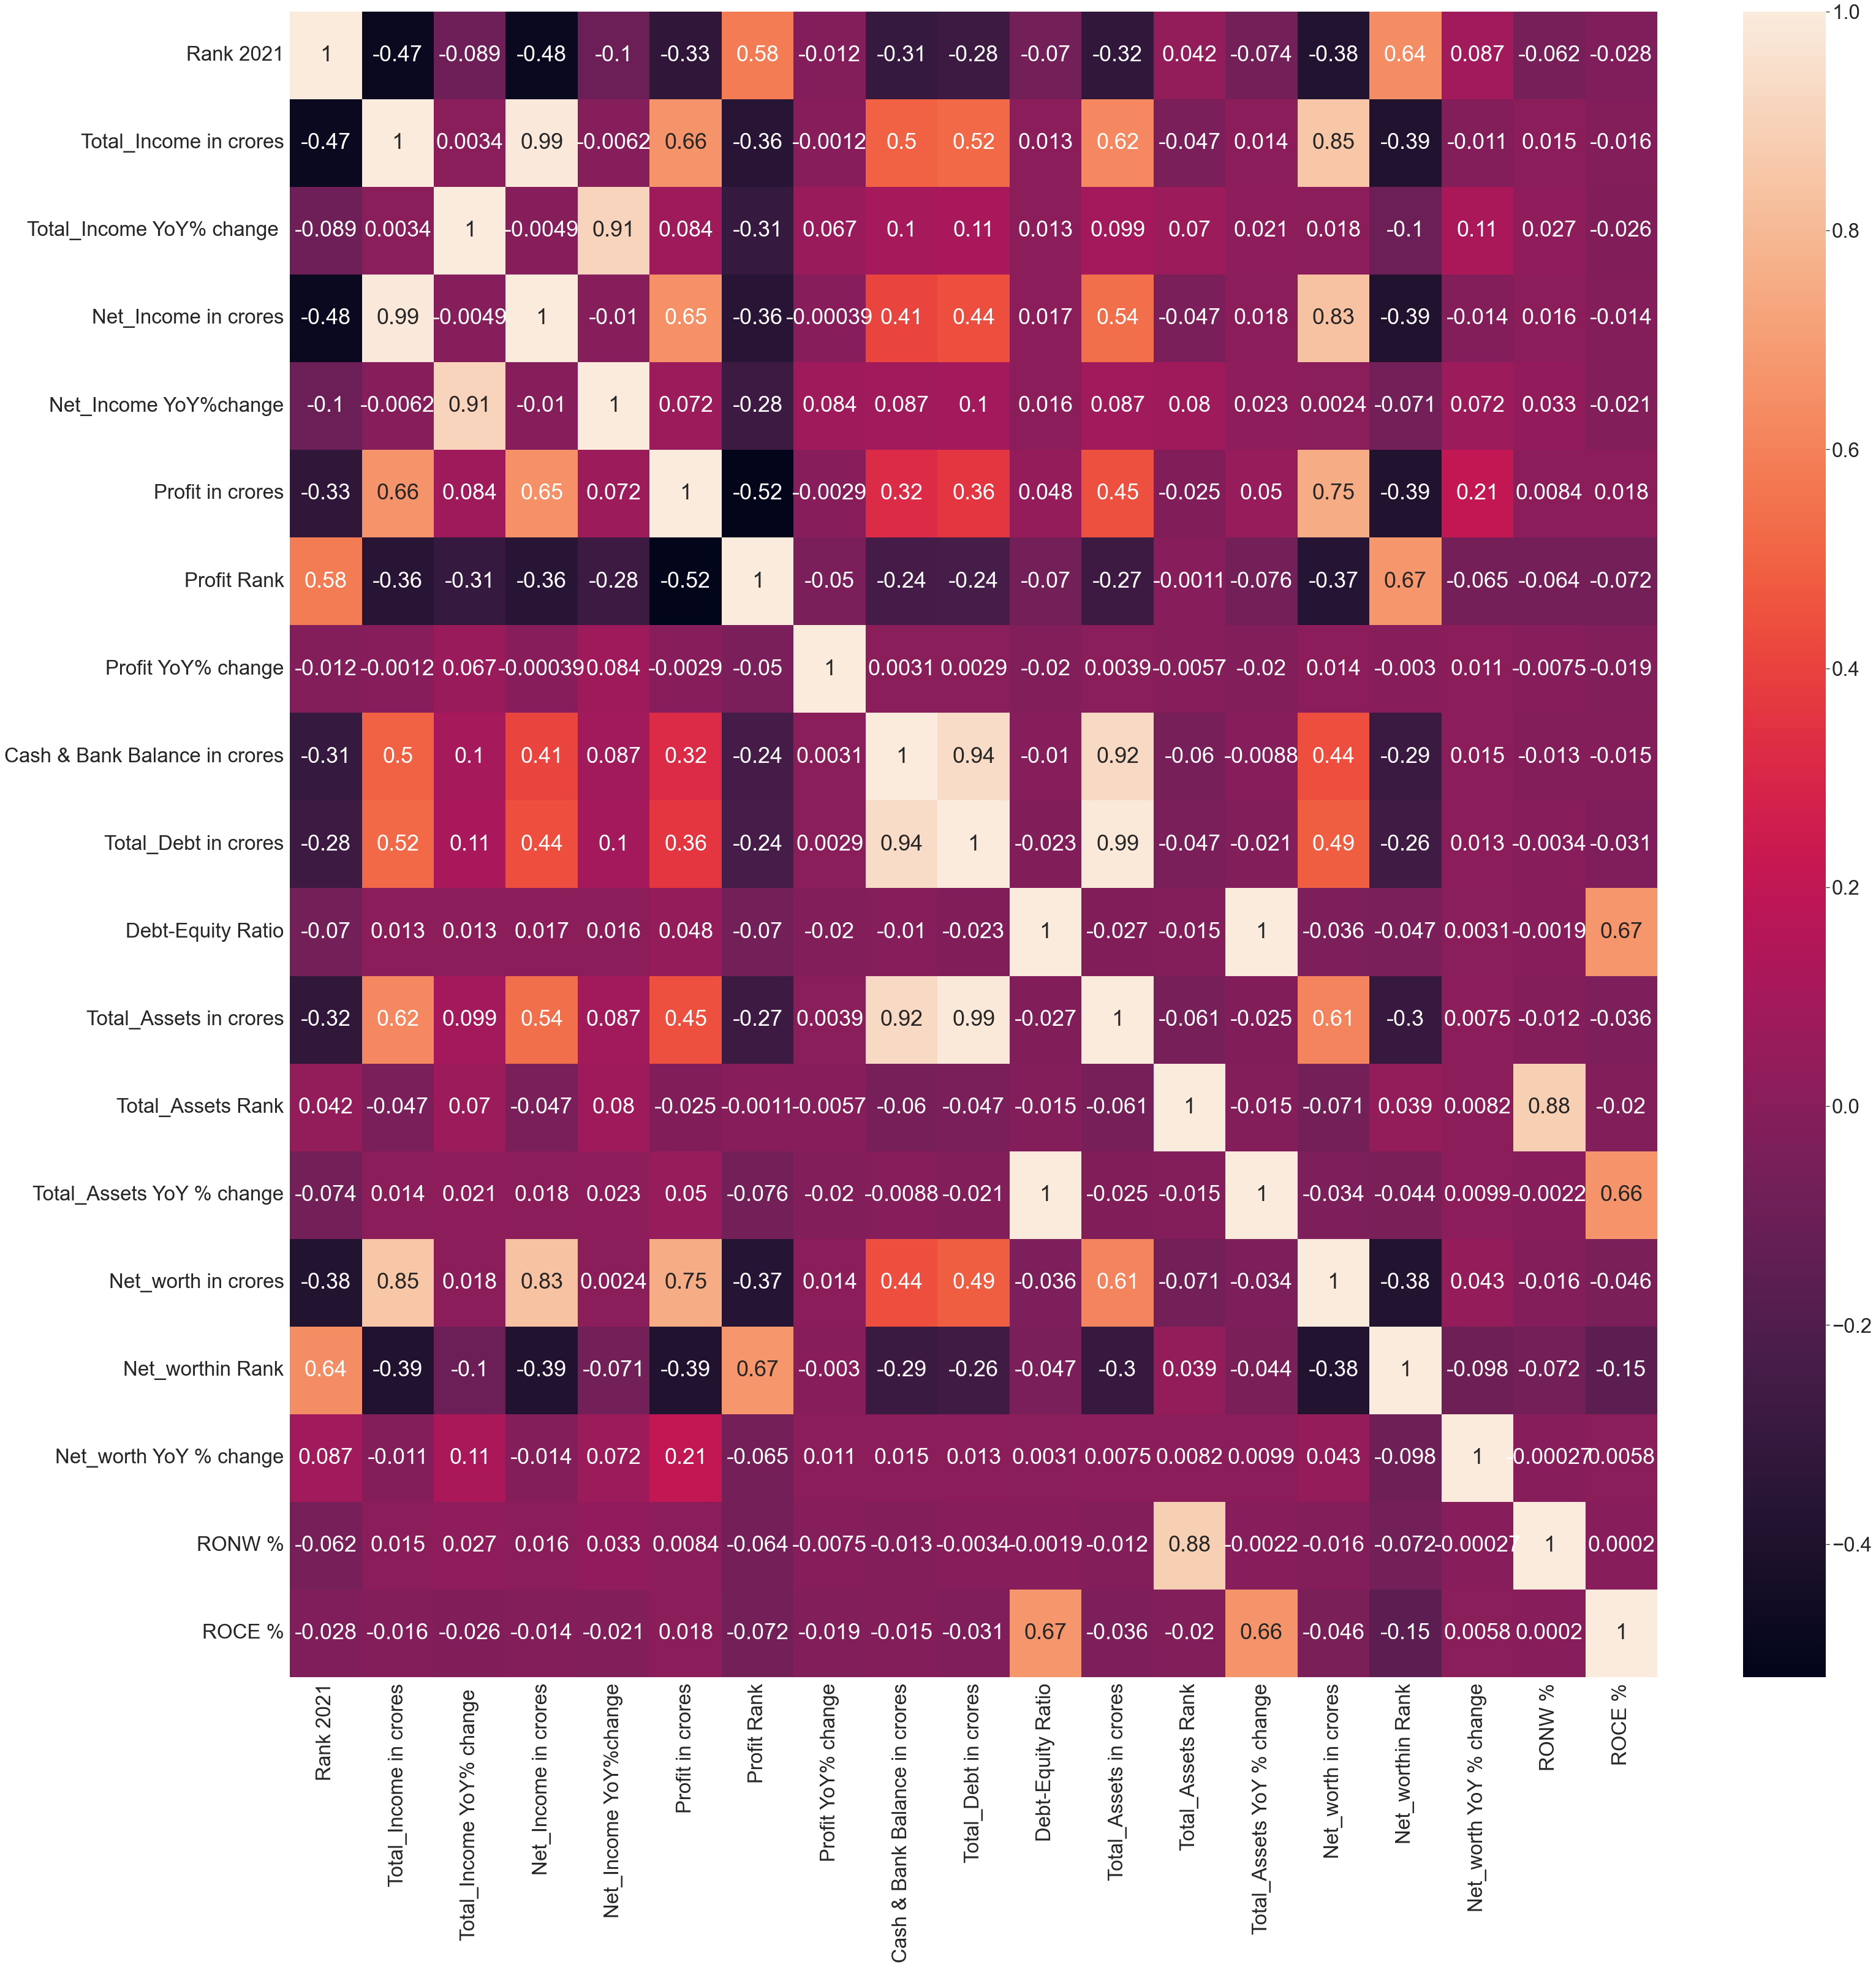

In [241]:
# making heatmap to find correlation
plt.figure(figsize=(50,50))
sns.heatmap(F2.corr(),annot=True)
sns.set(font_scale=2)
plt.show()

### a. To find the top 10 industries with highest profit based on year 2021. 
#####     Grouping the data based on Industries

In [23]:
By_Industry = F2.groupby("Industry")
By_Industry.groups

{'Auto': [4, 25, 27, 44, 53, 55, 66, 69, 77, 92, 113, 115, 155, 159, 200, 247, 248, 258, 350, 460, 492], 'Auto ancillaries': [34, 70, 86, 91, 97, 128, 146, 161, 188, 194, 206, 209, 211, 229, 231, 279, 316, 324, 327, 329, 357, 376, 387, 405, 410, 444, 445, 449, 474, 475, 482], 'Aviation': [96], 'Banks': [1, 7, 9, 17, 18, 20, 21, 22, 35, 38, 40, 48, 59, 60, 63, 64, 81, 82, 88, 90, 101, 102, 103, 114, 144, 167, 172, 182, 183, 184, 208, 214, 275, 304, 310, 313, 326, 334, 373, 402, 428, 457], 'Cement': [41, 61, 106, 107, 143, 193, 204, 205, 251, 257, 280, 291, 311, 386, 413, 426, 472], 'Chemicals': [140, 149, 154, 286, 294, 341, 365, 389, 390, 391, 398, 434, 442, 447, 489], 'Construction': [147, 175, 179, 181, 201, 207, 235, 261, 309, 355, 375, 379, 399, 415, 417, 422, 473, 495], 'Consumer durables': [132, 152, 162, 185, 192, 212, 246, 269, 270, 299, 308, 340, 363, 369, 377, 396, 406, 468, 483, 485], 'Consumer products': [419, 435], 'Diversified': [24, 109, 118, 177], 'Electronics': [104, 3

In [24]:
# Finding the sum of profits based on industries
By_Industry['Profit in crores'].sum()

Industry
Auto                            2706
Auto ancillaries               11162
Aviation                       -5806
Banks                         127671
Cement                         16682
Chemicals                       4698
Construction                    1940
Consumer durables               5809
Consumer products                400
Diversified                     6645
Electronics                     2559
Engineering                    14855
FMCG                           45459
Fertilisers & agrochem          9608
Financial services              5213
Gems & jewellery                1165
Gems & jewellery (refiner)      -246
Healthcare                       100
Holding Company                  113
Hospitality                    -3382
IT services                    85552
Infotech                         594
Infrastructure                  1782
Logistics                       2765
Logistics (ship building)       1123
Media & entertainment           1856
Metals                       

In [25]:
# finding the statistical information of dataset
By_Industry['Profit in crores'].describe()

,count,mean,std,min,25%,50%,75%,max
Industry,,,,,,,,
Auto,21.0,128.857143,3495.759521,-13451.0,-160.00,42.0,1347.00,4857.0
Auto ancillaries,31.0,360.064516,383.027322,-632.0,138.00,314.0,551.50,1277.0
Aviation,1.0,-5806.000000,NaN,-5806.0,-5806.00,-5806.0,-5806.00,-5806.0
Banks,42.0,3039.785714,6521.516472,-3489.0,365.25,1001.0,2884.00,31833.0
Cement,17.0,981.294118,1367.512329,-30.0,207.00,405.0,1231.00,5463.0
Chemicals,15.0,313.200000,241.343916,-219.0,181.00,302.0,500.00,776.0
Construction,18.0,107.777778,393.519647,-662.0,22.75,229.5,267.75,953.0
Consumer durables,20.0,290.450000,284.519627,-78.0,115.00,191.0,379.25,1044.0
Consumer products,2.0,200.000000,53.740115,162.0,181.00,200.0,219.00,238.0


In [66]:
By_Industry['Profit in crores'].sum().max()

127671

In [67]:
By_Industry['Profit in crores'].sum().min()

-58066

In [ ]:
# Rearranging the industry column and profit column in the form of dictionaries

In [26]:
industry_profitd = dict(By_Industry['Profit in crores'].sum())
industry_profitd

{'Auto': 2706,
 'Auto ancillaries': 11162,
 'Aviation': -5806,
 'Banks': 127671,
 'Cement': 16682,
 'Chemicals': 4698,
 'Construction': 1940,
 'Consumer durables': 5809,
 'Consumer products': 400,
 'Diversified': 6645,
 'Electronics': 2559,
 'Engineering': 14855,
 'FMCG': 45459,
 'Fertilisers & agrochem': 9608,
 'Financial services': 5213,
 'Gems & jewellery': 1165,
 'Gems & jewellery (refiner)': -246,
 'Healthcare': 100,
 'Holding Company': 113,
 'Hospitality': -3382,
 'IT services': 85552,
 'Infotech': 594,
 'Infrastructure': 1782,
 'Logistics': 2765,
 'Logistics (ship building)': 1123,
 'Media & entertainment': 1856,
 'Metals': 44911,
 'Metals (pipes)': 101,
 'Mining & minerals': 19557,
 'Mining (equipment)': 69,
 'NBFC': 66786,
 'Oil & gas': 119641,
 'Packaging': 2817,
 'Paper': 172,
 'Pharma': 40809,
 'Plastics': 2623,
 'Power': 40138,
 'Power - Renewables': -181,
 'Power services': 1445,
 'Real estate': 3115,
 'Retail': -2553,
 'Services': 501,
 'Telecom (Ancillaries)': -4701,
 '

In [ ]:
# Fetching top 10 industries having maximum profit

In [27]:
import operator
maximum_10profit = dict(sorted(industry_profitd.items(), key=operator.itemgetter(1), reverse=True)[:10])
print(maximum_10profit)

{'Banks': 127671, 'Oil & gas': 119641, 'IT services': 85552, 'NBFC': 66786, 'FMCG': 45459, 'Metals': 44911, 'Pharma': 40809, 'Power': 40138, 'Mining & minerals': 19557, 'Cement': 16682}


In [28]:
top_10keys = maximum_10profit.keys()
top_10keys

dict_keys(['Banks', 'Oil & gas', 'IT services', 'NBFC', 'FMCG', 'Metals', 'Pharma', 'Power', 'Mining & minerals', 'Cement'])

In [29]:
top_10values = maximum_10profit.values()
top_10values

dict_values([127671, 119641, 85552, 66786, 45459, 44911, 40809, 40138, 19557, 16682])

In [30]:
# Bar chart representing top 10 industries with their profits 

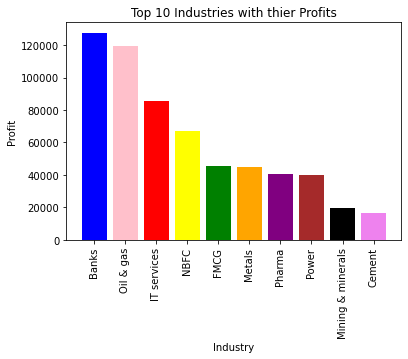

In [31]:
plt.bar(top_10keys,top_10values,color = ['blue','pink','red','yellow','green','orange','purple','brown','black','violet'])
plt.xlabel('Industry')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title("Top 10 Industries with thier Profits")
plt.show()

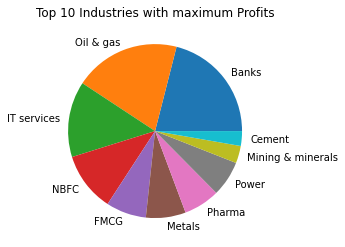

In [33]:
plt.pie(top_10values,labels = top_10keys)
plt.title("Top 10 Industries with maximum Profits")
plt.show()

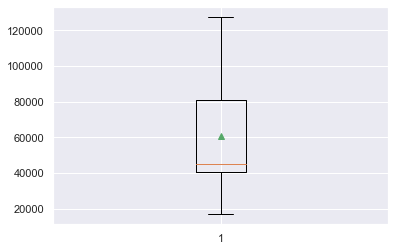

In [212]:
# boxplot 
plt.boxplot(top_10values, showmeans=True)
plt.show()

In [35]:
# Finding 10 industries with  minimum profit

In [37]:
import operator
minimum_10profit = dict(sorted(industry_profitd.items(), key=operator.itemgetter(1), reverse=False)[:10])
print(minimum_10profit)

{'Telecom services': -58066, 'Aviation': -5806, 'Telecom (Ancillaries)': -4701, 'Hospitality': -3382, 'Retail': -2553, 'Gems & jewellery (refiner)': -246, 'Power - Renewables': -181, 'Mining (equipment)': 69, 'Healthcare': 100, 'Metals (pipes)': 101}


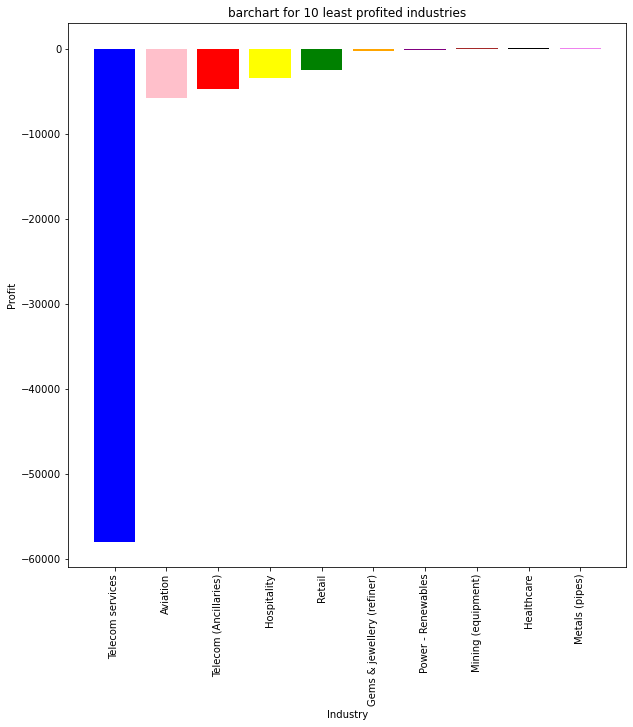

In [39]:
plt.figure(figsize=(10,10))
plt.bar(minimum_10profit.keys(),minimum_10profit.values(),color = ['blue','pink','red','yellow','green','orange','purple','brown','black','violet'])
plt.xlabel('Industry')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title("barchart for 10 least profited industries")
plt.show()

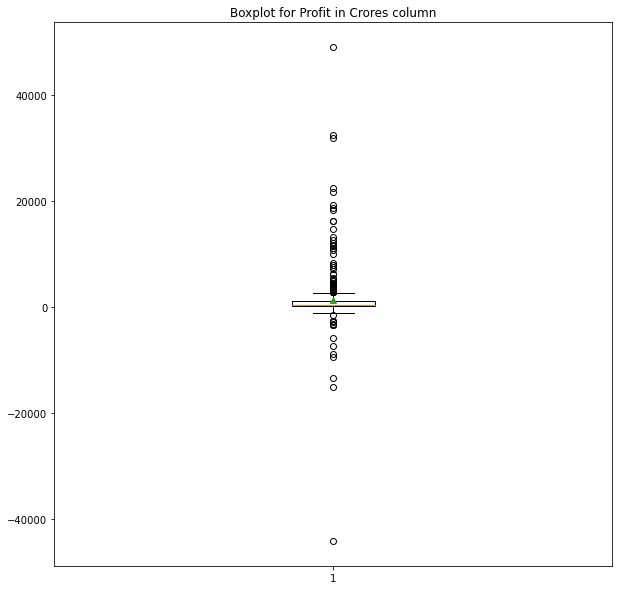

In [40]:
# Boxplot for profit in crores column
plt.figure(figsize=(10,10))
plt.boxplot(F2['Profit in crores'], showmeans=True)
plt.title("Boxplot for Profit in Crores column")
plt.show()

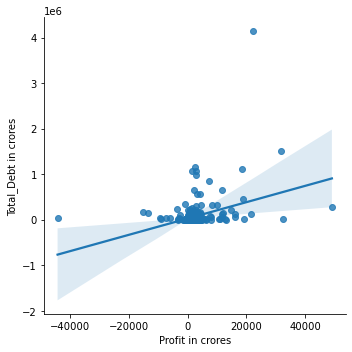

In [83]:
# lmplot
sns.lmplot(x="Profit in crores", y="Total_Debt in crores", data=F2)
plt.show()

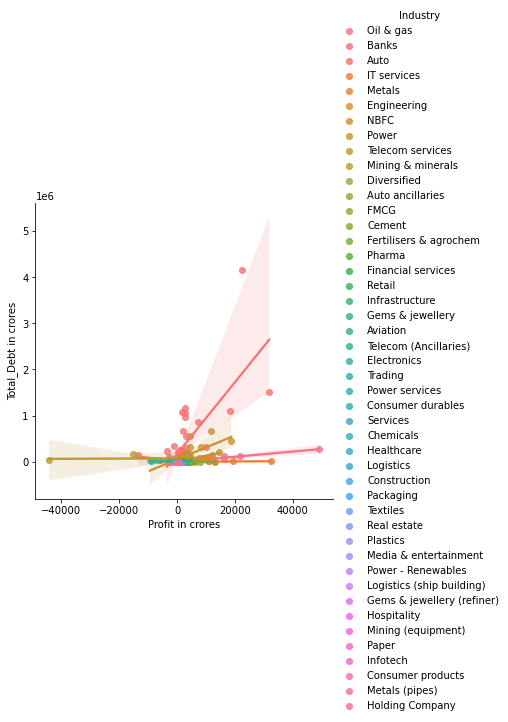

In [84]:
# lmplot using hue to differentiate according to industries
sns.lmplot(x="Profit in crores", y="Total_Debt in crores", hue="Industry", data = F2)
plt.show()

### b. To find the top 10 and last 10 companies based on Income.

In [86]:
F2['Total_Income in crores'].describe()

count       500.000000
mean      17663.118000
std       44968.516988
min        1954.000000
25%        3097.500000
50%        5478.500000
75%       11965.750000
max      514217.000000
Name: Total_Income in crores, dtype: float64

In [41]:
top_10_income_companies= F2[['Company name','Total_Income in crores']][:10]
top_10_income_companies

,Company name,Total_Income in crores
0,Reliance Industries,514217
1,State Bank of India,385338
2,Indian Oil Corporation,374828
3,ONGC,325179
4,Tata Motors,249646
5,Bharat Petroleum Corporation,241425
6,Tata Consultancy Services,167311
7,ICICI Bank,161336
8,Tata Steel,156174
9,HDFC Bank,155885


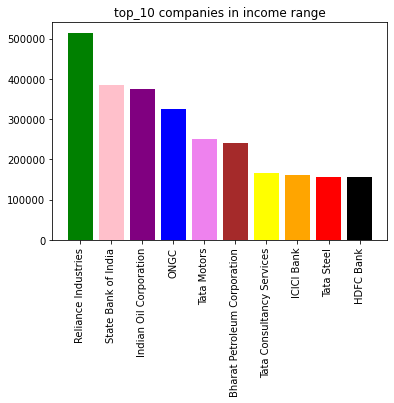

In [46]:
plt.bar(top_10_income_companies['Company name'],top_10_income_companies['Total_Income in crores'],color=['green','pink','purple','blue','violet','brown','yellow','orange','red','black'])
plt.xticks(rotation=90)
plt.title("top_10 companies in income range")
plt.show()

In [44]:
last_10_income_companies = F2[['Company name','Total_Income in crores']][-10:]
last_10_income_companies

,Company name,Total_Income in crores
490,Rane Holdings,2051
491,Prince Pipes & Fittings,2044
492,Force Motors,2040
493,Can Fin Homes,2018
494,IOL Chemicals & Pharmaceuticals,2008
495,Ahluwalia Contracts (India),2005
496,Himatsingka Seide,1994
497,Tata Teleservices,1982
498,Dodla Dairy,1966
499,Jyothy Labs,1954


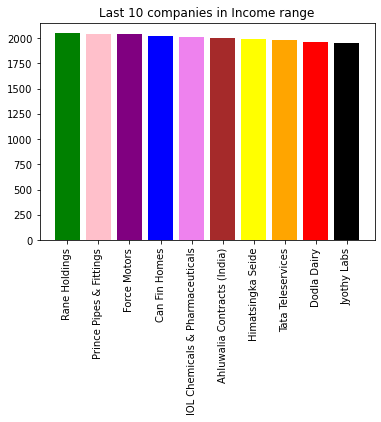

In [47]:
plt.bar(last_10_income_companies['Company name'],last_10_income_companies['Total_Income in crores'],color=['green','pink','purple','blue','violet','brown','yellow','orange','red','black'])
plt.xticks(rotation=90)
plt.title("Last 10 companies in Income range")
plt.show()

In [131]:
Remaining_top_income = F2[['Company name','Total_Income in crores']][10:]
Remaining_top_income

,Company name,Total_Income in crores
10,Larsen & Toubro,147303
11,HDFC,145993
12,Hindalco Industries,135485
13,NTPC,118214
14,Bharti Airtel,112386
...,...,...
495,Ahluwalia Contracts (India),2005
496,Himatsingka Seide,1994
497,Tata Teleservices,1982
498,Dodla Dairy,1966


In [48]:
# comparison of incomes of top 10 companies and remaining 490 companies using Pie chart

In [144]:
Remaining_income = F2['Total_Income in crores'][10:].sum()
Remaining_income

6100220

In [145]:
Total_income_500 = top_10_income_companies.append({'Company name':'Remaining','Total_Income in crores':Remaining_income},ignore_index=True)
Total_income_500

C:\Users\pavan\AppData\Local\Temp\ipykernel_64172\3805497151.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Total_income_500 = top_10_income_companies.append({'Company name':'Remaining','Total_Income in crores':Remaining_income},ignore_index=True)


,Company name,Total_Income in crores
0,Reliance Industries,514217
1,State Bank of India,385338
2,Indian Oil Corporation,374828
3,ONGC,325179
4,Tata Motors,249646
5,Bharat Petroleum Corporation,241425
6,Tata Consultancy Services,167311
7,ICICI Bank,161336
8,Tata Steel,156174
9,HDFC Bank,155885


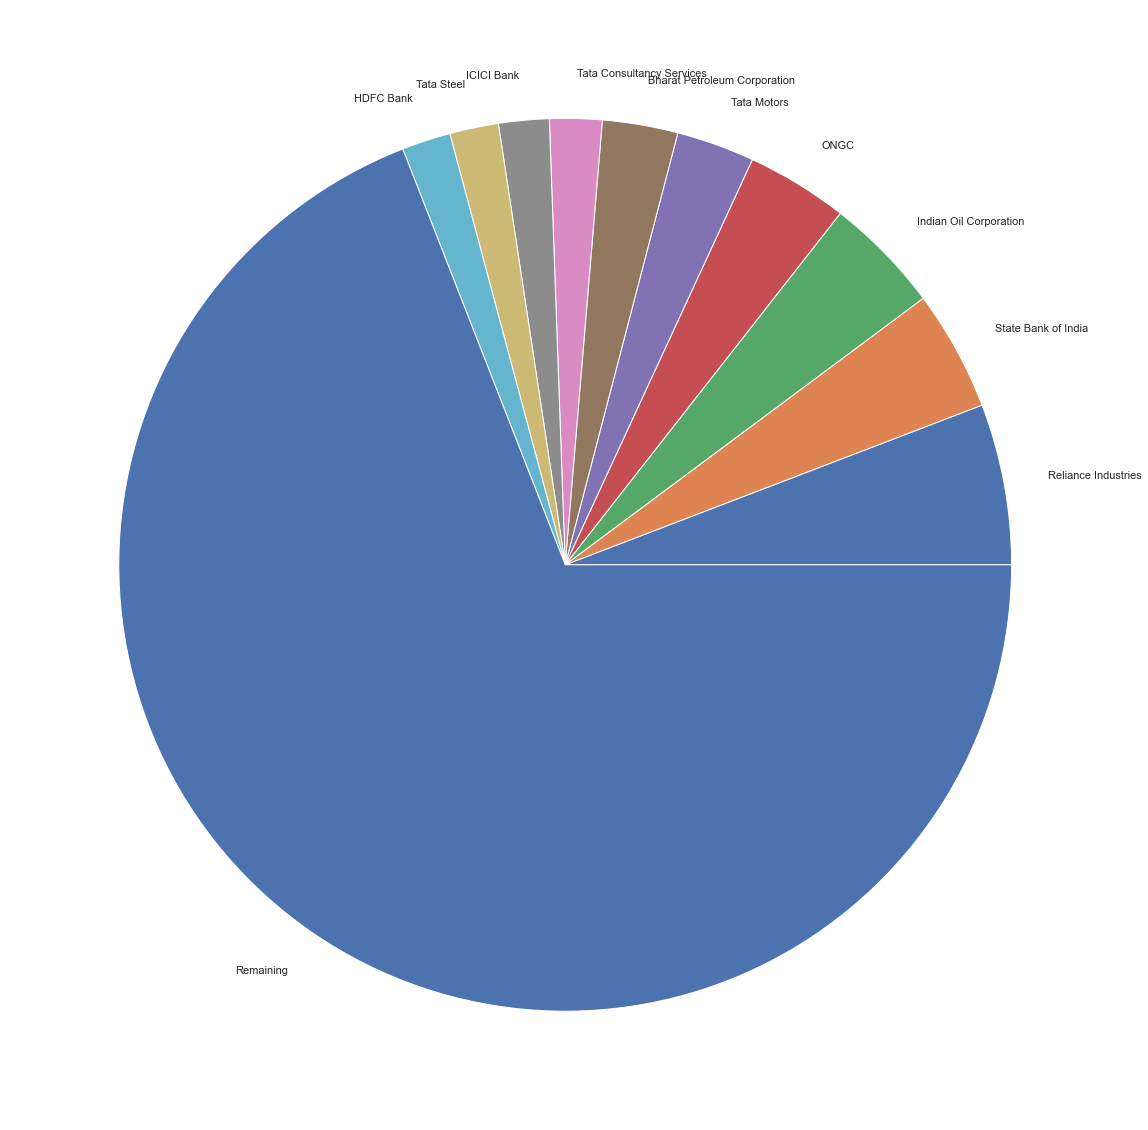

In [222]:
plt.figure(figsize=(20,30))
plt.pie(Total_income_500['Total_Income in crores'],labels=Total_income_500['Company name'] )
plt.show()

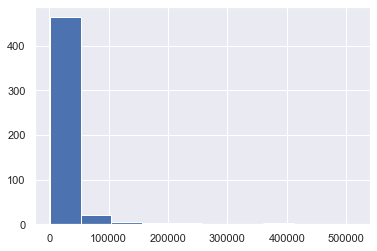

In [182]:
# plotting histogram
plt.hist(F2['Total_Income in crores'])
plt.show()

C:\Anjusha\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


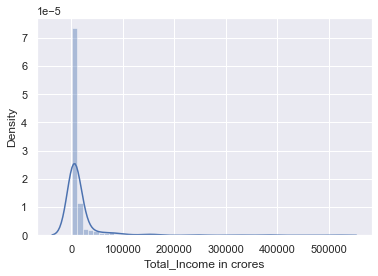

In [181]:
# plotting Displot
sns.distplot(F2['Total_Income in crores'], kde=True)
plt.show()

## CONCLUSION

Using the information from Fortune 500 companies data,
We found that banking sector has more profit compared to all the other industries followed by oil & gas and IT services.

Reliance industries with Rs.514217 Cr has the most income and Jyothy labs with Rs.1954 Cr has the least income among income of all 500 companies.